<a href="https://colab.research.google.com/github/GeorgiaXXH/data-science/blob/main/asset_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Data and package preparation



## A. Data preparation

In [81]:
pip install transformers

In [82]:
import numpy as np
import pandas as pd
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix, classification_report
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
# ## for bert language model
import transformers
import matplotlib.pyplot as plt

In [83]:
import gdown
id = "1b2lwGLOlar5ml9iTv89bwK_81CdtMMiQ"
gdown.download(id=id, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1b2lwGLOlar5ml9iTv89bwK_81CdtMMiQ
To: /content/assets01(ful)_04_18_2022.csv
100%|██████████| 182M/182M [00:00<00:00, 309MB/s]


'assets01(ful)_04_18_2022.csv'

In [84]:
df=pd.read_csv('assets01(ful)_04_18_2022.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (16,40,63,68) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,num_sales,background_color,image_url,image_preview_url,image_thumbnail_url,image_original_url,animation_url,animation_original_url,name,...,token_id_total_supply,token_id_count,token_id_num_owners,token_id_average_price,token_id_num_reports,token_id_market_cap,token_id_floor_price,asset_favorites,asset_category,creator
0,201652920,0,NaN,https://lh3.googleusercontent.com/pUDYH7EnULJc...,https://lh3.googleusercontent.com/pUDYH7EnULJc...,https://lh3.googleusercontent.com/pUDYH7EnULJc...,NaN,NaN,NaN,#3365,...,9970.0,9970.0,158,0.061149,1,0.000000,0,4,art,NaN
1,76611595,0,NaN,https://lh3.googleusercontent.com/NixgIufh8tt9...,https://lh3.googleusercontent.com/NixgIufh8tt9...,https://lh3.googleusercontent.com/NixgIufh8tt9...,NaN,NaN,NaN,Byteosaurus #8403,...,9654.0,9654.0,2244,0.048864,5,166.559894,0,1,art,NaN
2,171963423,0,NaN,https://lh3.googleusercontent.com/F7JUs4kn5gfm...,https://lh3.googleusercontent.com/F7JUs4kn5gfm...,https://lh3.googleusercontent.com/F7JUs4kn5gfm...,NaN,NaN,NaN,crypto-totem#3597,...,5555.0,5555.0,66,0.019342,1,105.545000,0,7,art,NaN
3,126146016,0,NaN,https://lh3.googleusercontent.com/pUq0zWz_C1tn...,https://lh3.googleusercontent.com/pUq0zWz_C1tn...,https://lh3.googleusercontent.com/pUq0zWz_C1tn...,NaN,NaN,NaN,UltraPunk #3167,...,9997.0,9997.0,1031,0.050662,1,133.888393,0,2,art,NaN
4,266557610,2,NaN,https://lh3.googleusercontent.com/ndXzObLk0INB...,https://lh3.googleusercontent.com/ndXzObLk0INB...,https://lh3.googleusercontent.com/ndXzObLk0INB...,https://gateway.pinata.cloud/ipfs/QmTebXSjfphW...,NaN,NaN,AlphieWhale #6996,...,7777.0,7777.0,4870,0.122659,199,441.598549,0,1,art,NaN


In [85]:
# describe the original data
print(f'The shape of raw data is {df.shape}.\n')
print(f'The columns of raw data is {df.columns}\n')
print(f'There are {len(df.asset_category.unique())} categories.\n\nAnd they are {df.asset_category.unique()}')
print('\n')
print(df.asset_category.value_counts())

The shape of raw data is (19541, 130).

The columns of raw data is Index(['id', 'num_sales', 'background_color', 'image_url', 'image_preview_url',
       'image_thumbnail_url', 'image_original_url', 'animation_url',
       'animation_original_url', 'name',
       ...
       'token_id_total_supply', 'token_id_count', 'token_id_num_owners',
       'token_id_average_price', 'token_id_num_reports', 'token_id_market_cap',
       'token_id_floor_price', 'asset_favorites', 'asset_category', 'creator'],
      dtype='object', length=130)

There are 10 categories.

And they are ['art' 'photography' 'trading-cards' 'virtual-worlds' 'sports'
 'collectibles' 'utility' 'science&technology' 'domain-names' 'music']


art                   13992
collectibles           1905
utility                1261
virtual-worlds          731
domain-names            679
sports                  368
science&technology      261
trading-cards           251
music                    60
photography              33
Name: ass

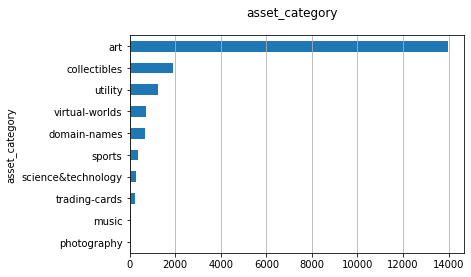

In [86]:
fig, ax = plt.subplots()
fig.suptitle("asset_category", fontsize=12)
df["asset_category"].reset_index().groupby("asset_category").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

### 1. imbalanced data processing

In [87]:
# oversampling and undersampling
def balance_data(df,target_cate):
  balance_df=pd.DataFrame()
  target_num=len(df.loc[df['asset_category']==target_cate],)
  # target_num=80
  cate_list=df.asset_category.unique()
  for i in cate_list:
    cate_num=len(df.loc[df['asset_category']==i],)
    if cate_num>target_num:
      tmp=df.loc[df['asset_category']==i].sample(target_num,replace=False)
    elif cate_num<target_num:
      tmp=df.loc[df['asset_category']==i].sample(target_num,replace=True)
    else:
      tmp=df.loc[df['asset_category']==i]
    balance_df=pd.concat([balance_df,tmp],axis=0)
  return balance_df


## B. Function defined for classifiers

In [88]:
def classifiers(X,y,embedding,classifier_name):
    X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)
    clf=Pipeline([('vectorizer',embedding),('clf',classifier_name)])
    clf.fit(X_train,y_train)
    predictions=clf.predict(X_test)
    global accuracy
    accuracy=accuracy_score(y_test,predictions)
    print(f'For classifier {classifier_name}:')
    print(f'\tThe accuracy score is {accuracy_score(y_test,predictions)}')
    print('\n')
    print(f'\t{classification_report(y_test,predictions,zero_division=0)}')
    print('\n')
    print('\n')

In [89]:
pip install tensorflow_text

In [90]:
import tensorflow_hub as hub
import tensorflow_text as text

In [91]:
process_url='https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
encode_url='https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'

In [106]:
def classifier_with_bert(X,y,classifier_name):
  clf=classifier_name
  clf.fit(bert_result['pooled_output'],y_train)
  predictions=clf.predict(bert_x_test['pooled_output'])
  global accuracy
  accuracy=accuracy_score(y_test,predictions)
  print(f'For classifier {classifier_name}:')
  print(f'\tThe accuracy score is {accuracy_score(y_test,predictions)}')
  print('\n')
  print(f'\t{classification_report(y_test,predictions,zero_division=0)}')
  print('\n')
  print('\n')

## C. Function defined for stopword changes

In [93]:
gdown.download(id='1gZlmqxCBUHBZZB5eLlN8bevJLQnQlS2h',quiet=False) #now
gdown.download(id='175GDNRXvpTk1wpnQw6-RLV8D9s9oyeEB',quiet=False) #word frequency for different category
gdown.download(id='19zl3BY9JX13Yt6Lxqll5sKndtmh7W1EY',quiet=False) #word frequency for common
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')
from nltk.stem.porter import PorterStemmer
def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]
def word_stem(wordlist):
    p_stemmer=PorterStemmer()
    return [p_stemmer.stem(w) for w in wordlist]

Downloading...
From: https://drive.google.com/uc?id=1gZlmqxCBUHBZZB5eLlN8bevJLQnQlS2h
To: /content/NFT news.xlsx
100%|██████████| 25.0k/25.0k [00:00<00:00, 13.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=175GDNRXvpTk1wpnQw6-RLV8D9s9oyeEB
To: /content/[no NOW]word dictionary by category.xlsx
100%|██████████| 706k/706k [00:00<00:00, 94.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=19zl3BY9JX13Yt6Lxqll5sKndtmh7W1EY
To: /content/High frequency word for common.csv
100%|██████████| 205k/205k [00:00<00:00, 48.5MB/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# II. Diiferent combination with input and stopword changes

## A. Description as the only input with simplist stopwords

### 1. stopwords

In [95]:
stopwords=nltk.corpus.stopwords.words('english')
df_tmp=df.copy()
for i in range(len(df_tmp)):
    df_tmp.description[i]=' '.join(word_stem(removeStopwords(str(df.description[i]).split(),stopwords)))
training_df=df[['description','asset_category']]
training_df=training_df[~df.description.isna()]
training_df=balance_data(training_df,'science&technology')
print(training_df.asset_category.value_counts())
X=list(training_df['description'].astype('str').values)
y=training_df.asset_category.astype('str').values
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


art                   241
photography           241
trading-cards         241
virtual-worlds        241
sports                241
collectibles          241
utility               241
science&technology    241
domain-names          241
music                 241
Name: asset_category, dtype: int64


### 2. classification with tfidf and counvectorizer

In [96]:
classifier_list=[MultinomialNB(),BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_1=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=TfidfVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_1.append(round(accuracy,2))
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_1}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.871859296482412


	                    precision    recall  f1-score   support

               art       0.69      0.26      0.38        77
      collectibles       0.83      0.77      0.80        82
      domain-names       0.87      1.00      0.93        80
             music       0.86      1.00      0.93        83
       photography       0.94      1.00      0.97        78
science&technology       0.95      0.94      0.94        78
            sports       0.81      0.96      0.88        75
     trading-cards       0.93      1.00      0.96        78
           utility       0.88      0.90      0.89        86
    virtual-worlds       0.85      0.89      0.87        79

          accuracy                           0.87       796
         macro avg       0.86      0.87      0.85       796
      weighted avg       0.86      0.87      0.86       796





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.73

In [97]:
accuracy_list_2=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=CountVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_2.append(round(accuracy,2))
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_2}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.8630653266331658


	                    precision    recall  f1-score   support

               art       0.56      0.29      0.38        77
      collectibles       0.77      0.80      0.79        82
      domain-names       0.83      1.00      0.91        80
             music       0.93      1.00      0.97        83
       photography       0.95      1.00      0.97        78
science&technology       0.95      0.88      0.91        78
            sports       0.83      0.92      0.87        75
     trading-cards       0.93      1.00      0.96        78
           utility       0.85      0.83      0.84        86
    virtual-worlds       0.89      0.90      0.89        79

          accuracy                           0.86       796
         macro avg       0.85      0.86      0.85       796
      weighted avg       0.85      0.86      0.85       796





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.7

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.885678391959799


	                    precision    recall  f1-score   support

               art       0.59      0.42      0.49        77
      collectibles       0.83      0.76      0.79        82
      domain-names       0.87      0.99      0.92        80
             music       0.97      1.00      0.98        83
       photography       0.97      0.97      0.97        78
science&technology       0.99      0.95      0.97        78
            sports       0.85      0.93      0.89        75
     trading-cards       0.93      1.00      0.96        78
           utility       0.90      0.92      0.91        86
    virtual-worlds       0.87      0.91      0.89        79

          accuracy                           0.89       796
         macro avg       0.88      0.88      0.88       796
      weighted avg       0.88      0.89      0.88       796





Method 4:
For classifier RandomForestClassifier():
	The accuracy score is 0.89070

In [98]:
print(pd.DataFrame({'Classifier':classifier_list,'TFIDF':accuracy_list_1,'Count':accuracy_list_2}))

                                          Classifier  TFIDF  Count
0                                    MultinomialNB()   0.87   0.86
1                                      BernoulliNB()   0.73   0.73
2                                        LinearSVC()   0.88   0.89
3  (DecisionTreeClassifier(max_features='auto', r...   0.89   0.89
4                           DecisionTreeClassifier()   0.87   0.88
5          XGBClassifier(objective='multi:softprob')   0.87   0.87


### 3. BERT within original description

In [99]:
classifier_list=[BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_bert=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifier_with_bert(X,y,classifier_name=i)
    index+=1
    accuracy_list_bert.append(round(accuracy,2))
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_bert}))

Method 1:
For classifier BernoulliNB():
	The accuracy score is 0.5251256281407035


	                    precision    recall  f1-score   support

               art       0.20      0.04      0.07        77
      collectibles       0.51      0.32      0.39        82
      domain-names       0.51      0.89      0.65        80
             music       0.40      0.77      0.52        83
       photography       0.41      0.72      0.52        78
science&technology       0.57      0.42      0.49        78
            sports       0.48      0.37      0.42        75
     trading-cards       0.96      0.99      0.97        78
           utility       0.60      0.52      0.56        86
    virtual-worlds       0.71      0.19      0.30        79

          accuracy                           0.53       796
         macro avg       0.54      0.52      0.49       796
      weighted avg       0.54      0.53      0.49       796





Method 2:


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.871859296482412


	                    precision    recall  f1-score   support

               art       0.58      0.27      0.37        77
      collectibles       0.81      0.72      0.76        82
      domain-names       0.86      0.99      0.92        80
             music       0.90      1.00      0.95        83
       photography       0.99      0.97      0.98        78
science&technology       0.99      0.95      0.97        78
            sports       0.80      0.99      0.88        75
     trading-cards       0.96      1.00      0.98        78
           utility       0.86      0.93      0.89        86
    virtual-worlds       0.83      0.89      0.86        79

          accuracy                           0.87       796
         macro avg       0.86      0.87      0.86       796
      weighted avg       0.86      0.87      0.86       796





Method 3:
For classifier RandomForestClassifier():
	The accuracy score is 0.87311

## starting to use description, name and trait as input

In [100]:
df=pd.read_csv('assets01(ful)_04_18_2022.csv')
import json
set(re.findall(r'\'(\w*_\w*)\':',df['traits'][0]))
# rs=json.loads(a)
trait_list=[]
for i in range(len(df)):
    if (~pd.isna(df['traits'][i]))&(df['traits'][i]!='[]'):
        tmp=re.findall(r'\'(\w*_*\w*)\':',df['traits'][i])
        trait_list.append(tmp)
trait_list=list(set(trait_list[0]))
trait_list.extend(['max_','none'])
df['texts']=df['name']+' '+df['description']+' '+df['traits']
df.texts=df.texts.apply(lambda x:re.sub(r'[^\w\s]','',str(x).lower())) # delete all the punctuations and special characters
for i in trait_list:
    df.texts=df.texts.apply(lambda x:re.sub(r'\d','',str(x).lower()).replace(i,'')) #delete the key values
    df.texts=df.texts.apply(lambda x:re.sub(r'\s{2,}',' ',x)) # delete the space more than once
df.texts=df.texts.apply(lambda x:re.sub(r'nan','',x))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (16,40,63,68) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## B. remove stopwords from now and stem back to original

### 1. stopwords

In [101]:
# add the high frequent word in NOW to the stopwords
stopwords=nltk.corpus.stopwords.words('english')
now_noun=pd.read_excel('NFT news.xlsx',sheet_name='NFT news noun',index_col='HELP')
now_adj=pd.read_excel('NFT news.xlsx',sheet_name='NFT news adj',index_col='HELP')
noun=now_noun['WORD (CLICK FOR CONTEXT)'].values.tolist()
for i in range(len(noun)):
    noun[i]=noun[i].lower()
adj=now_adj['WORD (CLICK FOR CONTEXT)'].values.tolist()
for i in range(len(adj)):
    adj[i]=str(adj[i]).lower()
stopwords.extend(noun)
stopwords.extend(adj)
stopwords=word_stem(stopwords)
stopwords=list(set(stopwords))
stopwords[0:5]
# pd.DataFrame(stopwords).to_csv('stopwords with now.csv',index=False)

["hasn't", 'by', 'small', 'what', "haven't"]

In [102]:
df_tmp=df.copy()
for i in range(len(df_tmp)):
    df_tmp.texts[i]=' '.join(word_stem(removeStopwords(df.texts[i].split(),stopwords)))
training_df=df_tmp[['texts','asset_category']]
training_df=training_df[~df.texts.isna()]
training_df=balance_data(training_df,'science&technology')
print(training_df.asset_category.value_counts())
X=list(training_df['texts'].astype('str').values)
y=training_df.asset_category.astype('str').values
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


art                   261
photography           261
trading-cards         261
virtual-worlds        261
sports                261
collectibles          261
utility               261
science&technology    261
domain-names          261
music                 261
Name: asset_category, dtype: int64


### 2. classification with tfidf and counvectorizer

In [103]:
classifier_list=[MultinomialNB(),BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_3=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=TfidfVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_3.append(round(accuracy,4))
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_3}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.7610208816705336


	                    precision    recall  f1-score   support

               art       0.80      0.28      0.41        87
      collectibles       0.85      0.45      0.59       102
      domain-names       0.88      1.00      0.93        86
             music       0.85      0.80      0.83        82
       photography       0.85      0.90      0.87        81
science&technology       0.95      0.93      0.94        88
            sports       0.40      0.88      0.55        75
     trading-cards       0.83      0.95      0.88        80
           utility       0.73      0.75      0.74        92
    virtual-worlds       0.87      0.76      0.81        89

          accuracy                           0.76       862
         macro avg       0.80      0.77      0.76       862
      weighted avg       0.81      0.76      0.75       862





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.6

In [104]:
accuracy_list_4=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=CountVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_4.append(round(accuracy,4))
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_4}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.7633410672853829


	                    precision    recall  f1-score   support

               art       0.53      0.30      0.38        87
      collectibles       0.71      0.54      0.61       102
      domain-names       0.88      1.00      0.93        86
             music       0.93      0.80      0.86        82
       photography       0.90      0.90      0.90        81
science&technology       0.94      0.92      0.93        88
            sports       0.41      0.92      0.57        75
     trading-cards       0.92      0.95      0.93        80
           utility       0.81      0.71      0.76        92
    virtual-worlds       0.90      0.69      0.78        89

          accuracy                           0.76       862
         macro avg       0.79      0.77      0.77       862
      weighted avg       0.79      0.76      0.76       862





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.6

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.7761020881670534


	                    precision    recall  f1-score   support

               art       0.57      0.33      0.42        87
      collectibles       0.75      0.48      0.59       102
      domain-names       0.88      1.00      0.93        86
             music       0.96      0.80      0.87        82
       photography       0.99      0.90      0.94        81
science&technology       0.98      0.93      0.95        88
            sports       0.39      0.95      0.55        75
     trading-cards       0.95      0.96      0.96        80
           utility       0.85      0.75      0.80        92
    virtual-worlds       0.87      0.75      0.81        89

          accuracy                           0.78       862
         macro avg       0.82      0.79      0.78       862
      weighted avg       0.82      0.78      0.78       862





Method 4:
For classifier RandomForestClassifier():
	The accuracy score is 0.7888

### 3. Bert

In [107]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)
bert_process_model = hub.KerasLayer(process_url)
X_train_processed = bert_process_model(X_train)
bert_model=hub.KerasLayer(encode_url)
bert_result=bert_model(X_train_processed)
X_test_processed = bert_process_model(X_test)
bert_x_test=bert_model(X_test_processed)
classifier_list=[BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_bert_2=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifier_with_bert(X,y,classifier_name=i)
    index+=1
    accuracy_list_bert_2.append(round(accuracy,2))
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_bert_2}))

Method 1:
For classifier BernoulliNB():
	The accuracy score is 0.45359628770301624


	                    precision    recall  f1-score   support

               art       0.15      0.03      0.06        87
      collectibles       0.57      0.08      0.14       102
      domain-names       0.51      0.90      0.65        86
             music       0.83      0.52      0.64        82
       photography       0.40      0.63      0.49        81
science&technology       0.86      0.20      0.33        88
            sports       0.36      0.65      0.46        75
     trading-cards       0.34      0.80      0.48        80
           utility       0.38      0.34      0.36        92
    virtual-worlds       0.64      0.53      0.58        89

          accuracy                           0.45       862
         macro avg       0.50      0.47      0.42       862
      weighted avg       0.51      0.45      0.41       862





Method 2:


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.7529002320185615


	                    precision    recall  f1-score   support

               art       0.55      0.28      0.37        87
      collectibles       0.71      0.43      0.54       102
      domain-names       0.85      1.00      0.92        86
             music       0.93      0.80      0.86        82
       photography       0.92      0.90      0.91        81
science&technology       0.93      0.93      0.93        88
            sports       0.41      0.96      0.57        75
     trading-cards       0.94      0.95      0.94        80
           utility       0.73      0.64      0.68        92
    virtual-worlds       0.85      0.75      0.80        89

          accuracy                           0.75       862
         macro avg       0.78      0.76      0.75       862
      weighted avg       0.78      0.75      0.75       862





Method 3:
For classifier RandomForestClassifier():
	The accuracy score is 0.7262

## C. stopwords=nft_new-10cate+common 200

### 1. stopwords

In [109]:
stopwords=nltk.corpus.stopwords.words('english')
now_noun=pd.read_excel('NFT news.xlsx',sheet_name='NFT news noun',index_col='HELP')
now_adj=pd.read_excel('NFT news.xlsx',sheet_name='NFT news adj',index_col='HELP')
noun=now_noun['WORD (CLICK FOR CONTEXT)'].values.tolist()
for i in range(len(noun)):
    noun[i]=noun[i].lower()
adj=now_adj['WORD (CLICK FOR CONTEXT)'].values.tolist()
for i in range(len(adj)):
    adj[i]=str(adj[i]).lower()
#10 categories' high frequent words
cate_sep=[]
for i in range(10):
    cate_sep.extend(pd.read_excel('[no NOW]word dictionary by category.xlsx',sheet_name=i).loc[0:200,'Word'].tolist())
#common frequent (top 200)
common_=pd.read_csv('High frequency word for common.csv').loc[0:200,'Word']
noun.extend(adj)
noun.extend(common_)
add_stop=list(set(noun)-set(cate_sep))
stopwords.extend(add_stop)
stopwords=word_stem(stopwords)
stopwords=list(set(stopwords))
stopwords[0:5]
# pd.DataFrame(stopwords).to_csv('stopwords with venn.csv',index=False)

["hasn't", 'by', 'what', "haven't", 'himself']

In [110]:
df_tmp=df.copy()
for i in range(len(df_tmp)):
    df_tmp.texts[i]=' '.join(word_stem(removeStopwords(df.texts[i].split(),stopwords)))
training_df=df_tmp[['texts','asset_category']]
training_df=training_df[~df.texts.isna()]
training_df=balance_data(training_df,'science&technology')
print(training_df.asset_category.value_counts())
X=list(training_df['texts'].astype('str').values)
y=training_df.asset_category.astype('str').values
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


art                   261
photography           261
trading-cards         261
virtual-worlds        261
sports                261
collectibles          261
utility               261
science&technology    261
domain-names          261
music                 261
Name: asset_category, dtype: int64


### 2. classification with tfidf and counvectorizer

In [111]:
classifier_list=[MultinomialNB(),BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_5=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=TfidfVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_5.append(round(accuracy,4))
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_5}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.7529002320185615


	                    precision    recall  f1-score   support

               art       0.70      0.26      0.38        87
      collectibles       0.87      0.39      0.54       102
      domain-names       0.91      1.00      0.95        86
             music       0.81      0.73      0.77        82
       photography       0.93      0.94      0.93        81
science&technology       0.91      0.92      0.92        88
            sports       0.43      0.99      0.60        75
     trading-cards       0.78      1.00      0.87        80
           utility       0.71      0.74      0.72        92
    virtual-worlds       0.86      0.69      0.76        89

          accuracy                           0.75       862
         macro avg       0.79      0.77      0.74       862
      weighted avg       0.79      0.75      0.74       862





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.6

In [112]:
accuracy_list_6=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=CountVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_6.append(round(accuracy,4))
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_6}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.7703016241299304


	                    precision    recall  f1-score   support

               art       0.50      0.32      0.39        87
      collectibles       0.78      0.59      0.67       102
      domain-names       0.91      1.00      0.95        86
             music       0.87      0.73      0.79        82
       photography       0.96      0.94      0.95        81
science&technology       0.91      0.91      0.91        88
            sports       0.42      0.97      0.59        75
     trading-cards       0.91      0.99      0.95        80
           utility       0.84      0.73      0.78        92
    virtual-worlds       0.96      0.62      0.75        89

          accuracy                           0.77       862
         macro avg       0.81      0.78      0.77       862
      weighted avg       0.81      0.77      0.77       862





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.6

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.7877030162412993


	                    precision    recall  f1-score   support

               art       0.64      0.32      0.43        87
      collectibles       0.83      0.52      0.64       102
      domain-names       0.91      0.99      0.95        86
             music       0.91      0.73      0.81        82
       photography       0.99      0.94      0.96        81
science&technology       0.99      0.93      0.96        88
            sports       0.40      0.96      0.56        75
     trading-cards       0.93      1.00      0.96        80
           utility       0.88      0.76      0.81        92
    virtual-worlds       0.82      0.82      0.82        89

          accuracy                           0.79       862
         macro avg       0.83      0.80      0.79       862
      weighted avg       0.83      0.79      0.79       862





Method 4:
For classifier RandomForestClassifier():
	The accuracy score is 0.8051

### 3. Bert

In [113]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)
bert_process_model = hub.KerasLayer(process_url)
X_train_processed = bert_process_model(X_train)
bert_model=hub.KerasLayer(encode_url)
bert_result=bert_model(X_train_processed)
X_test_processed = bert_process_model(X_test)
bert_x_test=bert_model(X_test_processed)
classifier_list=[BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_bert_3=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifier_with_bert(X,y,classifier_name=i)
    index+=1
    accuracy_list_bert_3.append(round(accuracy,2))
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_bert_3}))

Method 1:
For classifier BernoulliNB():
	The accuracy score is 0.4234338747099768


	                    precision    recall  f1-score   support

               art       0.12      0.05      0.07        87
      collectibles       0.80      0.08      0.14       102
      domain-names       0.43      0.95      0.60        86
             music       0.80      0.10      0.17        82
       photography       0.45      0.68      0.54        81
science&technology       0.86      0.20      0.33        88
            sports       0.34      0.63      0.44        75
     trading-cards       0.37      0.89      0.53        80
           utility       0.42      0.39      0.41        92
    virtual-worlds       0.58      0.40      0.48        89

          accuracy                           0.42       862
         macro avg       0.52      0.44      0.37       862
      weighted avg       0.53      0.42      0.36       862





Method 2:


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.7494199535962877


	                    precision    recall  f1-score   support

               art       0.40      0.23      0.29        87
      collectibles       0.73      0.52      0.61       102
      domain-names       0.90      0.99      0.94        86
             music       0.85      0.73      0.78        82
       photography       0.99      0.94      0.96        81
science&technology       0.95      0.89      0.92        88
            sports       0.41      0.96      0.58        75
     trading-cards       0.89      0.99      0.93        80
           utility       0.80      0.62      0.70        92
    virtual-worlds       0.82      0.74      0.78        89

          accuracy                           0.75       862
         macro avg       0.77      0.76      0.75       862
      weighted avg       0.78      0.75      0.75       862





Method 3:
For classifier RandomForestClassifier():
	The accuracy score is 0.7227

## D. stopwords=nft_new+10cate-common 200

### 1. stopwords

In [114]:
stopwords=nltk.corpus.stopwords.words('english')
now_noun=pd.read_excel('NFT news.xlsx',sheet_name='NFT news noun',index_col='HELP')
now_adj=pd.read_excel('NFT news.xlsx',sheet_name='NFT news adj',index_col='HELP')
noun=now_noun['WORD (CLICK FOR CONTEXT)'].values.tolist()
for i in range(len(noun)):
    noun[i]=noun[i].lower()
adj=now_adj['WORD (CLICK FOR CONTEXT)'].values.tolist()
for i in range(len(adj)):
    adj[i]=str(adj[i]).lower()
#10 categories' high frequent words
cate_sep=[]
for i in range(10):
    cate_sep.extend(pd.read_excel('[no NOW]word dictionary by category.xlsx',sheet_name=i).loc[0:200,'Word'].tolist())
#common frequent (top 200)
common_=pd.read_csv('High frequency word for common.csv').loc[0:200,'Word']
noun.extend(adj)
noun.extend(cate_sep)
add_stop=list(set(noun)-set(common_))
stopwords.extend(add_stop)
stopwords=word_stem(stopwords)
stopwords=list(set(stopwords))
stopwords[0:5]
# pd.DataFrame(stopwords).to_csv('stopwords with venn reverse200.csv',index=False)

['law', 'icaml', 'casino', 'scale', 'by']

In [115]:
df_tmp=df.copy()
for i in range(len(df_tmp)):
    df_tmp.texts[i]=' '.join(word_stem(removeStopwords(df.texts[i].split(),stopwords)))
training_df=df_tmp[['texts','asset_category']]
training_df=training_df[~df.texts.isna()]
training_df=balance_data(training_df,'science&technology')
print(training_df.asset_category.value_counts())
X=list(training_df['texts'].astype('str').values)
y=training_df.asset_category.astype('str').values
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


art                   261
photography           261
trading-cards         261
virtual-worlds        261
sports                261
collectibles          261
utility               261
science&technology    261
domain-names          261
music                 261
Name: asset_category, dtype: int64


### 2. classification with tfidf and counvectorizer

In [116]:
classifier_list=[MultinomialNB(),BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_7=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=TfidfVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_7.append(round(accuracy,4))
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_7}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.7691415313225058


	                    precision    recall  f1-score   support

               art       0.83      0.33      0.48        87
      collectibles       0.91      0.29      0.44       102
      domain-names       0.98      1.00      0.99        86
             music       0.81      0.76      0.78        82
       photography       0.92      0.90      0.91        81
science&technology       0.94      0.93      0.94        88
            sports       0.40      0.91      0.55        75
     trading-cards       0.79      0.99      0.88        80
           utility       0.71      0.87      0.78        92
    virtual-worlds       0.94      0.83      0.88        89

          accuracy                           0.77       862
         macro avg       0.82      0.78      0.76       862
      weighted avg       0.83      0.77      0.76       862





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.7

In [117]:
accuracy_list_8=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=CountVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_8.append(round(accuracy,4))
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_8}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.7819025522041764


	                    precision    recall  f1-score   support

               art       0.70      0.36      0.47        87
      collectibles       0.69      0.43      0.53       102
      domain-names       0.98      1.00      0.99        86
             music       0.87      0.73      0.79        82
       photography       0.94      0.90      0.92        81
science&technology       0.95      0.93      0.94        88
            sports       0.40      0.92      0.55        75
     trading-cards       0.87      0.99      0.92        80
           utility       0.84      0.85      0.84        92
    virtual-worlds       0.96      0.81      0.88        89

          accuracy                           0.78       862
         macro avg       0.82      0.79      0.78       862
      weighted avg       0.82      0.78      0.78       862





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.7

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.7830626450116009


	                    precision    recall  f1-score   support

               art       0.63      0.38      0.47        87
      collectibles       0.67      0.37      0.48       102
      domain-names       0.97      1.00      0.98        86
             music       0.93      0.76      0.83        82
       photography       0.97      0.90      0.94        81
science&technology       1.00      0.93      0.96        88
            sports       0.38      0.91      0.53        75
     trading-cards       0.93      0.99      0.96        80
           utility       0.86      0.80      0.83        92
    virtual-worlds       0.90      0.90      0.90        89

          accuracy                           0.78       862
         macro avg       0.82      0.79      0.79       862
      weighted avg       0.82      0.78      0.78       862





Method 4:
For classifier RandomForestClassifier():
	The accuracy score is 0.7969

### 3. Bert

In [118]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)
bert_process_model = hub.KerasLayer(process_url)
X_train_processed = bert_process_model(X_train)
bert_model=hub.KerasLayer(encode_url)
bert_result=bert_model(X_train_processed)
X_test_processed = bert_process_model(X_test)
bert_x_test=bert_model(X_test_processed)
classifier_list=[BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_bert_4=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifier_with_bert(X,y,classifier_name=i)
    index+=1
    accuracy_list_bert_4.append(round(accuracy,2))
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_bert_4}))

Method 1:
For classifier BernoulliNB():
	The accuracy score is 0.4443155452436195


	                    precision    recall  f1-score   support

               art       0.18      0.02      0.04        87
      collectibles       0.00      0.00      0.00       102
      domain-names       0.63      0.90      0.74        86
             music       0.62      0.20      0.30        82
       photography       0.49      0.60      0.54        81
science&technology       0.48      0.42      0.45        88
            sports       0.30      0.53      0.38        75
     trading-cards       0.38      0.79      0.51        80
           utility       0.35      0.60      0.44        92
    virtual-worlds       0.68      0.49      0.57        89

          accuracy                           0.44       862
         macro avg       0.41      0.46      0.40       862
      weighted avg       0.40      0.44      0.39       862





Method 2:


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.7470997679814385


	                    precision    recall  f1-score   support

               art       0.54      0.37      0.44        87
      collectibles       0.35      0.72      0.47       102
      domain-names       0.97      0.99      0.98        86
             music       0.85      0.76      0.80        82
       photography       0.90      0.90      0.90        81
science&technology       0.98      0.91      0.94        88
            sports       0.80      0.37      0.51        75
     trading-cards       0.93      0.99      0.96        80
           utility       0.85      0.67      0.75        92
    virtual-worlds       0.92      0.79      0.85        89

          accuracy                           0.75       862
         macro avg       0.81      0.75      0.76       862
      weighted avg       0.80      0.75      0.75       862





Method 3:
For classifier RandomForestClassifier():
	The accuracy score is 0.7366

# Summary 

In [119]:
accuracy_list_bert.insert(0,'N/A')
accuracy_list_bert_2.insert(0,'N/A')
accuracy_list_bert_3.insert(0,'N/A')
accuracy_list_bert_4.insert(0,'N/A')

In [126]:
accuracy_compare=dict()
columnslists=['input: description, embedding: TFIDF, stopwords:nltk','input: description, embedding: count, stopwords:nltk','input: description, embedding: BERT, stopwords:nltk',
                          'input: description+name+trait, embedding: TFIDF, stopwords:nltk+now','input: description+name+trait, embedding: count, stopwords:nltk+now','input: description+name+trait, embedding: BERT, stopwords:nltk+now',
                          'input: description+name+trait, embedding: TFIDF, stopwords:nltk+now-10cate+common 200','input: description+name+trait, embedding: count, stopwords:nltk+now-10cate+common 200','input: description+name+trait, embedding: BERT, stopwords:nltk+now-10cate+common 200',
                          'input: description+name+trait, embedding: TFIDF, stopwords:nltk+now+10cate-common 200','input: description+name+trait, embedding: count, stopwords:nltk+now+10cate-common 200','input: description+name+trait, embedding: BERT, stopwords:nltk+now+10cate-common 200']
accuracylists=[accuracy_list_1,accuracy_list_2,accuracy_list_bert,accuracy_list_3,accuracy_list_4,accuracy_list_bert_2,accuracy_list_5,accuracy_list_6,accuracy_list_bert_3,accuracy_list_7,accuracy_list_8,accuracy_list_bert_4]
for i in range(12):
  accuracy_compare[columnslists[i]]=accuracylists[i]
accuracy_compare=pd.DataFrame(accuracy_compare,index=['MultinomialNB','BernoulliNB','LinearSVC','RandomForestClassifier','DecisionTreeClassifier','XGBClassifier'])
writer = pd.ExcelWriter('accuracy compare.xlsx')
accuracy_compare.to_excel(writer)
writer.save()

In [127]:
from google.colab import files
files.download('accuracy compare.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [128]:
accuracy_compare

,"input: description, embedding: TFIDF, stopwords:nltk","input: description, embedding: count, stopwords:nltk","input: description, embedding: BERT, stopwords:nltk","input: description+name+trait, embedding: TFIDF, stopwords:nltk+now","input: description+name+trait, embedding: count, stopwords:nltk+now","input: description+name+trait, embedding: BERT, stopwords:nltk+now","input: description+name+trait, embedding: TFIDF, stopwords:nltk+now-10cate+common 200","input: description+name+trait, embedding: count, stopwords:nltk+now-10cate+common 200","input: description+name+trait, embedding: BERT, stopwords:nltk+now-10cate+common 200","input: description+name+trait, embedding: TFIDF, stopwords:nltk+now+10cate-common 200","input: description+name+trait, embedding: count, stopwords:nltk+now+10cate-common 200","input: description+name+trait, embedding: BERT, stopwords:nltk+now+10cate-common 200"
MultinomialNB,0.87,0.86,N/A,0.7610,0.7633,N/A,0.7529,0.7703,N/A,0.7691,0.7819,N/A
BernoulliNB,0.73,0.73,0.53,0.6798,0.6798,0.45,0.6578,0.6578,0.42,0.7019,0.7019,0.44
LinearSVC,0.88,0.89,0.87,0.7784,0.7761,0.75,0.7981,0.7877,0.75,0.7889,0.7831,0.75
RandomForestClassifier,0.89,0.89,0.87,0.7831,0.7889,0.73,0.8016,0.8051,0.72,0.7970,0.7970,0.74
DecisionTreeClassifier,0.87,0.88,0.81,0.7587,0.7599,0.64,0.7506,0.7610,0.63,0.7599,0.7645,0.64
XGBClassifier,0.87,0.87,0.87,0.7633,0.7587,0.73,0.7657,0.7691,0.73,0.7703,0.7633,0.74
